# Bad habbits vs Education

This guided project aims to explore whether there is a connection between the student population and "bad" habits or behaviors that may negatively impact people's health. The habits to study are:

-  Coffee adiction.
- Smoking.
- Videogames adiction.

Understanding the demographic factors of this habits in a culture and the connection with the students population could help society to understand if this bad habits or missused habits are directly related to the stress faced by higher education students. Suggesting the need to restructure the current higher education programs in places where this adictions are higher.

*Press the '↓' key*

In [ ]:
#LIBRARIES

import pandas as pd #For reading and handling CSV files.
import numpy as np  # For numerical operations and handling missing values.
import matplotlib.pyplot as plt  # For creating basic visualizations.
import seaborn as sns  # For advanced data visualization used in the infographic.

The code above list all the python libraries we will be using and what they are used for.

## Load Data

Using Pandas library "pd" we will convert the chosen datasets for this project into variables for better handling. Using the command "pd.read_csv()" as shown below.

*Press the '↓' key*


In [ ]:
# Importing the CSV files
coffee_df = pd.read_csv('Datasets/coffee.csv')
smoking_df = pd.read_csv('Datasets/smoking.csv')
gamers_df = pd.read_csv('Datasets/gamers.csv')
edstats_df = pd.read_csv('Datasets/edstats.csv')

## Data Previsualization.

Before going to the next step, it's important to display all the datasets head (first 5 columns), the size of the dataset using the method "shape" and list their features or column headers in order to explain the aim of each dataset. 

In [ ]:
#Display head (5 first rows)
print("Coffee DataFrame:")
print(coffee_df.head(), "\n")

#size display
print(f"Size:\nRows: {coffee_df.shape[0]}, Columns: {coffee_df.shape[1]}")


#Display features
print("coffee columns:", coffee_df.columns.tolist(), "\n")

**coffee_df**

This simple dataset has a list of a 183 countries and their coffee consumption per capita in the years 2020 and 2016 in KG. It will be usefull to recognize the countries with a high coffee consumption. more information about this dataset will be found in the reference area along with all the other datasets information.

In [ ]:
#Display head (5 first rows)
print("Smoking DataFrame:")
print(smoking_df.head(), "\n")

#size display
print(f"Size:\nRows: {smoking_df.shape[0]}, Columns: {smoking_df.shape[1]}")


#Display features
print("smoking columns:", smoking_df.columns.tolist(), "\n")

**smoking_df**:

This dataset shows the smoking rates or pocentage in population of 164 countries, in the years 2022, 2021 and 2020. It also shows the data between male and female of those countries. This can be used to compare the differences in consumption between countries and the diferences in consumption of cigarretes by gender.

In [ ]:
#Display head (5 first rows)
print("Gamers DataFrame:")
print(gamers_df.head(), "\n")

#size display
print(f"Size:\nRows: {gamers_df.shape[0]}, Columns: {gamers_df.shape[1]}")

#Display features
print("gamers columns:", gamers_df.columns.tolist(), "\n")

**gamers_df**

This table offers data bout 29 countries, the number of market revenue  in the videogames industry in millions of dollars, the internet penetration in a porcentage, the number of gamers in millions, the revenue in the mobile market in millions of dollars, the yearly spending on Mobile Games per user in dollars and the English Proficiency or average of people that speaks english. This dataset is rich on information but reduced in countries when it comes to the number of coutries. However it can be used to analyze the amount of gamers per country mainly.

In [ ]:
#Display head (5 first rows)
print("Students Enrolment DataFrame:")
print(edstats_df.head(), "\n")

#size display
print(f"Size:\nRows : {edstats_df.shape[0]}, Columns: {edstats_df.shape[1]}")

#Display features
print("student enrolment columns:", edstats_df.columns.tolist(), "\n")

**edstats_df**

This dataset shows a huge amount of data as the collection was made per series and is not only designed per country, therefore we can use it for analyzing very specific information per country. In this project we will mainly use it to analyze the higher education population per country. We will have to filter and study all the different series and use the most relevant ones for the project.

***Processing Data:***

We will progresively remove or handle missing values, correcting or convert data types accurately, filtering out unnecessary rows or columns, transforming data by normalizing, scaling, or aggregating to ensure consistency and usability.




**Coffee_df:**

Now to process this dataset, we will do the following in a new dataset called **coffee2020_df**:

1. Remove unnecessary features, specifically the 2016 data.
2. Rename columns to give them clearer titles.
3. Remove missing values.
4. Change data type when needed, as by default is often adopted "string" type.
5. Set 'Country' as the dataset index.

The main reason for keeping only the 2020 information is to perform a country-to-country analysis within the same year.


In [ ]:
# Copy the coffee_df to a new DataFrame for processing
coffee2020_df = coffee_df.copy()

# 1. Remove the "coffeeConsumptionByCountry_perCapitaCons2016" feature
coffee2020_df = coffee2020_df.drop(columns=['coffeeConsumptionByCountry_perCapitaCons2016'])

# 2. Rename columns for clarity
coffee2020_df = coffee2020_df.rename(columns={
    'coffeeConsumptionByCountry_perCapitaCons2020': 'Coffee per capita in 2020 (KG)',
    'country': 'Country'
})

# 3. Remove rows with missing values or "0"
coffee2020_df = coffee2020_df.dropna()
coffee2020_df = coffee2020_df[coffee2020_df['Coffee per capita in 2020 (KG)'] != 0]

# Convert the 'Coffee per capita in 2020 (KG)' column to float
coffee2020_df['Coffee per capita in 2020 (KG)'] = coffee2020_df['Coffee per capita in 2020 (KG)'].astype(float)

# 5. Set 'Country' as the dataset index
coffee2020_df = coffee2020_df.set_index('Country')

We will now verify that the data has been processed correctly by using checking for missing values and printing the new features. Also we can print how many columns and rows have been remove by using the size of the original dataframe taking away the size the new dataframe as shown below: 

In [ ]:
# Check for missing (NaN) or empty (blank) values
empty_values = (coffee2020_df == '').sum().sum()  # Count empty strings
missing_or_empty_values = coffee2020_df.isnull().sum().sum() + empty_values

print(f"Total missing or empty values: {missing_or_empty_values}")

# Print the features (columns) of the processed dataset
print("Features in coffee2020_df:", coffee2020_df.columns.tolist())


# Calculate and display the difference in rows and columns
row_diff, col_diff = coffee_df.shape[0] - coffee2020_df.shape[0], coffee_df.shape[1] - coffee2020_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}")


We can conclude that this dataframe has been processed properly and now is ready for merging or visualization in the next step.

**Smoking_df:**

Similary, it's needed to create a new csv table called **smoking2020_df**:

1. Remove unnecessary features, all the data from 2022 and 2021.
2. Rename columns to give them clearer titles.
3. Change data type when neededto interger.
4. Remove missing values or empty strings per row.
5. Set 'Country' as the dataset index.

In [ ]:
# 1. Create a new DataFrame with only 2020 data
smoking2020_df = smoking_df[['country', 'smokingRatesByCountry_rateBothPct2020', 
                               'smokingRatesByCountry_rateMalePct2020', 
                               'smokingRatesByCountry_rateFemalePct2020']]

# 2. Rename the columns for clarity
smoking2020_df = smoking2020_df.rename(columns={
    'country': 'Country',
    'smokingRatesByCountry_rateBothPct2020': 'Smoking rate in 2020(%)',
    'smokingRatesByCountry_rateMalePct2020': 'Male smoking rate in 2020(%)',
    'smokingRatesByCountry_rateFemalePct2020': 'Female smoking rate in 2020(%)'
})

# 3. Convert the columns to integers, coercing errors to NaN
smoking2020_df['Smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Smoking rate in 2020(%)'], errors='coerce')
smoking2020_df['Male smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Male smoking rate in 2020(%)'], errors='coerce')
smoking2020_df['Female smoking rate in 2020(%)'] = pd.to_numeric(smoking2020_df['Female smoking rate in 2020(%)'], errors='coerce')

# 4. Remove missing or unwanted data
smoking2020_df = smoking2020_df.replace('', np.nan)  # Replace empty strings with NaN
smoking2020_df = smoking2020_df.replace('0', np.nan)  # Replace '0' with NaN
smoking2020_df = smoking2020_df.dropna()  # Drop rows with NaN values

# 5. Set 'Country' as the dataset index
smoking2020_df = smoking2020_df.set_index('Country')


We follow the same procedure to verify  processing of this table. Concluding that the data processing has been succesfull as shown below. 

In [ ]:
# Check for missing (NaN) or empty (blank) values
empty_values = (smoking2020_df == '').sum().sum()  # Count empty strings
missing_or_empty_values =smoking2020_df.isnull().sum().sum() + empty_values

print(f"Total missing or empty values: {missing_or_empty_values}")

# Print the features (columns) of the processed dataset
print("Features in smoking2020_df:",smoking2020_df.columns.tolist())


# Calculate and display the difference in rows and columns
row_diff, col_diff = smoking_df.shape[0] - smoking2020_df.shape[0], smoking_df.shape[1] -smoking2020_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}")


**Gamers_df:**

We will process the gamers_df dataset similarly, creatign a new dataframe, *gamers2019_df*, performing the following tasks:

1. Remove unnecessary columns.
2. Rename columns to give them clearer titles.
3. Convert relevant columns to the correct data type.
4. Remove rows with missing or incorrect data.
5. Set 'Country' as the dataset index.

In [ ]:
# 1. Create a new DataFrame with only the 'country' and 'Number of Gamers (millions)' columns
gamers2019_df = gamers_df[['Country', 'Number of Gamers (millions)']]

# 2. Rename the columns for clarity
gamers2019_df = gamers2019_df.rename(columns={'Number of Gamers (millions)': 'Gamers in 2019(MM)'})

# 3. Convert the 'Gamers in 2019(MM)' column to numeric, coercing errors to NaN
gamers2019_df['Gamers in 2019(MM)'] = pd.to_numeric(gamers2019_df['Gamers in 2019(MM)'], errors='coerce')

# 4. Remove rows with missing values (NaN)
gamers2019_df = gamers2019_df.dropna()

# 5. Set 'Country' as the dataset index
gamers2019_df = gamers2019_df.set_index('Country')




Now we verify the dataframe and changes made:

In [ ]:
# Check for missing (NaN) or empty (blank) values in gamers2019_df
empty_values = (gamers2019_df == '').sum().sum()  # Count empty strings
missing_or_empty_values = gamers2019_df.isnull().sum().sum() + empty_values

print(f"Total missing or empty values: {missing_or_empty_values}")

# Print the features (columns) of the processed dataset
print("Features in gamers2019_df:", gamers2019_df.columns.tolist())

# Calculate and display the difference in rows and columns between original and processed DataFrame
row_diff, col_diff = gamers_df.shape[0] - gamers2019_df.shape[0], gamers_df.shape[1] - gamers2019_df.shape[1]
print(f"Difference in rows: {row_diff}\nDifference in columns: {col_diff}")


**EdStats:**

This dataframe requires to carry on a particulary more complex approach. since we first need to find what "Series" we want to filter first. Before following our typical processing approach. It's important to create an *"enrolment_df"* where we will use "str.contains()" method to filter all the series with the word enrolment in the Series column. 
We display the different titles in series using the "unique()" method, displaying every single unique value.

In [ ]:
# Filter rows where the 'Series' column contains the word 'enrollment'
enrolment_df = edstats_df['Series'][edstats_df['Series'].str.contains('enrolment', case=False, na=False)]

# Get unique values from the 'Series' column that contain 'enrollment'
unique_enrolment_df = enrolment_df.unique()

# Display the list of unique strings containing 'enrollment'
print(unique_enrolment_df)



From this information we can conclude that we want the following series only: 'Enrolment in tertiary education, all programmes, both sexes (number)'

Now we proceed to:
1. Remove unnecessary rows (All th rows with irrelevant information).
2. Rename columns to give them clearer titles.
3. Remove unnecessary columns (We will only keep Country and the year 2020)
4. Remove rows with missing or incorrect data.
5. Convert relevant columns to the correct data type.
6. Create a new column that handles the both years (2019 and 2020) prioritizing the most recent.
7. Drop rows without numeric data in either 2019 and 2020.
8. Set 'Country' as the dataset index.


In [ ]:
# Filter edstats_df for rows where 'Series' matches the specified series exactly
edstats2020_df = edstats_df[edstats_df['Series'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

# Rename columns in edstats2020_df
edstats2020_df = edstats2020_df.rename(columns={'Country Name': 'Region', 
                                                '2020 [YR2020]': 'Students in 2020',
                                                '2019 [YR2019]': 'Students in 2019'
                                                })

# Keep only 'Region', 'Students in 2019' and 'Students in 2020' columns
edstats2020_df = edstats2020_df[['Region', 'Students in 2020','Students in 2019']]

# Remove any non-numeric characters from 'Students in 2020' and 'Students in 2019'
edstats2020_df['Students in 2020'] = edstats2020_df['Students in 2020'].replace(r'[^0-9]', '', regex=True)
edstats2020_df['Students in 2019'] = edstats2020_df['Students in 2019'].replace(r'[^0-9]', '', regex=True)

# Convert 'Students in 2020' and 'Students in 2019' columns to integers or NaN
edstats2020_df['Students in 2020'] = pd.to_numeric(edstats2020_df['Students in 2020'], errors='coerce').astype('Int64')
edstats2020_df['Students in 2019'] = pd.to_numeric(edstats2020_df['Students in 2019'], errors='coerce').astype('Int64')

# Create 'Students in 2019-20' column with preference for 'Students in 2020' values
edstats2020_df['Students in 2019-20'] = edstats2020_df['Students in 2020'].combine_first(edstats2020_df['Students in 2019'])

# Keep only 'Region' and 'Students in 2019-20' columns
edstats2020_df = edstats2020_df[['Region', 'Students in 2019-20']]

# Drop rows where 'Students in 2019-20' is NaN
edstats2020_df = edstats2020_df.dropna(subset=['Students in 2019-20'])

# Set 'Region' as the index
edstats2020_df = edstats2020_df.set_index('Region')


#size display
print(f"Size:\nRows: {edstats2020_df.shape[0]}, Columns: {edstats2020_df.shape[1]}")

Something very peculiar about this World Bank Groups dataset is the fact that it does not provide only countries but also regions. Therefore we will list all the 'regions' available and then we will proceed to create a data map after carefully choosing each countries most accurate equivalent. Better explained in the merging section.

In [ ]:
# Display unique country names in the 'Country' column of edstats2020_df
unique_regions = edstats2020_df.index.unique()
print("Unique regions in edstats2020_df:\n", unique_regions)

**Merging tables**

The last step to follow is to merge "coffee2020_df", "smoking2020_df" and "gamers2019_df" into one single data frame called **"habits2020_df"**.

In [ ]:
# Merge the DataFrames on 'Country' without including edstats2020_df
habits2020_df = smoking2020_df.join(gamers2019_df, how='inner', rsuffix='_gamers')
habits2020_df = habits2020_df.join(coffee2020_df, how='inner', rsuffix='_coffee')

# Display the size of the resulting DataFrame
print("Size of habits2020_df:", habits2020_df.shape)



As mentioned before, edstats_df does not have a 'Country' column but a 'Region' instead, in order to merge smoothly this two datasets into a single "HABITS VS EDUCATION" dataframe. We need to add  a 'Region' column to habits2020_df and assign logical values from the "unique_regions" list created before.

To achieve this we have made manually a map, When possible we will use the already existing Country for example, China and South Africa. otherwise we allocated it by simple proximity.

In [ ]:
# Creating a mapping from habits2020_df to regions in edstats2020_df
country_to_region_mapping = {
    'China': 'China',  # Direct match
    'United States': 'North America',  # United States in North America
    'Indonesia': 'East Asia & Pacific',  # Indonesia in Southeast Asia
    'Brazil': 'Latin America & Caribbean',  # Brazil in Latin America
    'Russia': 'Europe & Central Asia',  # Russia in Eastern Europe
    'Japan': 'East Asia & Pacific',  # Japan in East Asia
    'Philippines': 'East Asia & Pacific',  # Philippines in Southeast Asia
    'Vietnam': 'East Asia & Pacific',  # Vietnam in Southeast Asia
    'Iran': 'Middle East & North Africa',  # Iran in the Middle East
    'Turkey': 'Europe & Central Asia',  # Turkey in Eastern Europe / Middle East
    'Germany': 'Europe & Central Asia',  # Germany in Europe
    'Thailand': 'East Asia & Pacific',  # Thailand in Southeast Asia
    'United Kingdom': 'Europe & Central Asia',  # UK in Europe
    'France': 'Europe & Central Asia',  # France in Europe
    'South Africa': 'South Africa',  # Direct match
    'Italy': 'Europe & Central Asia',  # Italy in Europe
    'South Korea': 'East Asia & Pacific',  # South Korea in East Asia
    'Spain': 'Europe & Central Asia',  # Spain in Europe
    'Canada': 'North America',  # Canada in North America
    'Poland': 'Europe & Central Asia',  # Poland in Europe
    'Saudi Arabia': 'Middle East & North Africa',  # Saudi Arabia in the Middle East
    'Australia': 'East Asia & Pacific',  # Australia in Oceania
    'United Arab Emirates': 'Middle East & North Africa'  # UAE in the Middle East
}

Now we use the map to create our 'Region' Column in a new dataframe called "habits2020_REG":

In [ ]:
# Copy the dataframe correctly
habits2020_REG = habits2020_df.copy()  # Add parentheses to properly copy the DataFrame

# Now, map the 'Country' (index) to 'Region' using the country_to_region_mapping
habits2020_REG['Region'] = habits2020_REG.index.map(country_to_region_mapping)


# Group by 'Region' and compute the mean for each region
habits2020_REG = habits2020_REG.groupby('Region').mean()

# Optional: Reset index if you want 'Region' as a column instead of the index
habits2020_REG = habits2020_REG.reset_index()

# Print or inspect the new DataFrame
print(habits2020_REG)

# Set 'Region' as the new index
habits2020_REG.set_index('Region', inplace=True)

# Display the size of the resulting DataFrame
print("Size of habits2020_REG:", habits2020_REG.shape)


Now we will merge habits2020_REG with edstats2020_df. Finally achieving our goal target habits_vs_education_df.

***habits_vs_education_df:***

In [ ]:
# Merge habits2020_REG and edstats2020_df on 'Region'
habits_vs_education_df = habits2020_REG.merge(edstats2020_df, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame to verify the result
print(habits_vs_education_df)

# Display the size of the resulting DataFrame
print("Size of habits_vs_education_df:", habits_vs_education_df.shape)

unique_index_values = habits_vs_education_df.index.unique()
print(unique_index_values)



From habits_vs_education_df we will collect the data we need for each graphic desired to be displayed, as listed below:

- figure1 will have a display of the contrast of smoking by gender for each region or country.
- figure2 will have
- figure 3 will have 

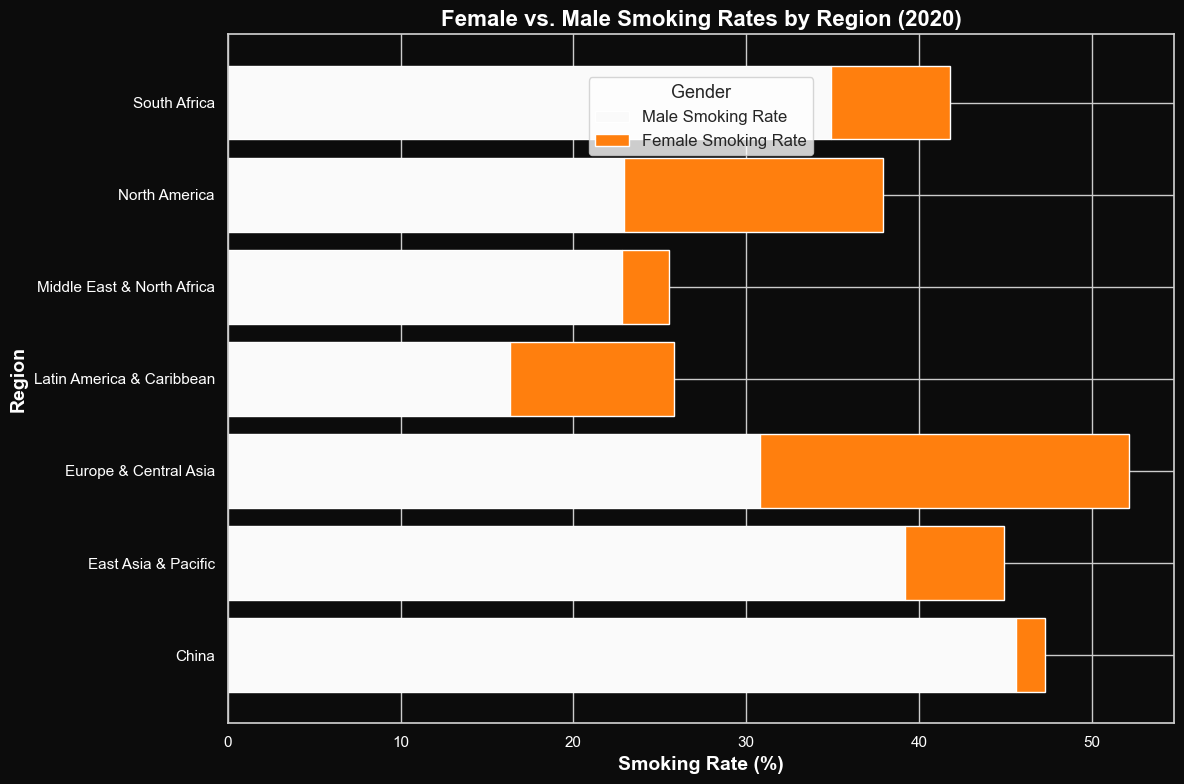

In [ ]:
# Prepare the data for the table
fig1_df = habits_vs_education_df[['Male smoking rate in 2020(%)', 'Female smoking rate in 2020(%)']]
fig1_df.index = habits_vs_education_df.index  # Ensure Region is set as the index
fig1_df = fig1_df.rename(columns={
    'Male smoking rate in 2020(%)': 'Male Smoking Rate (%)',
    'Female smoking rate in 2020(%)': 'Female Smoking Rate (%)'
})

# Create a horizontal bar chart for Female smoking rate over Male smoking rate
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Male smoking rate bars
male_bars = ax.barh(fig1_df.index, fig1_df['Male Smoking Rate (%)'], color='#fafafa', label='Male Smoking Rate')

# Plot Female smoking rate bars over Male smoking rate
female_bars = ax.barh(fig1_df.index, fig1_df['Female Smoking Rate (%)'], 
                      left=fig1_df['Male Smoking Rate (%)'], color='#ff7f0e', label='Female Smoking Rate')

# Customize the chart
ax.set_title('Female vs. Male Smoking Rates by Region (2020)', fontsize=16, weight='bold', color='white')
ax.set_xlabel('Smoking Rate (%)', fontsize=14, weight='bold', color='white')
ax.set_ylabel('Region', fontsize=14, weight='bold', color='white')
ax.set_facecolor('#0c0c0c')  # Inner chart background color
fig.patch.set_facecolor('#0c0c0c')  # Outer background color
ax.tick_params(colors='white')  # Set tick label color to white

# Add a legend
ax.legend(title='Gender', fontsize=12, title_fontsize=13, loc='lower left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the chart
plt.show()

***DATA VIZUALIZATION***

Now we will display the relevant data:

In [ ]:

sns.set_theme(style="whitegrid", palette="pastel") # Set the style for the plot

# Prepare data for the plot
df = habits_vs_education_df[['Male smoking rate in 2020(%)', 'Female smoking rate in 2020(%)']]
df = df.T
df.columns = habits_vs_education_df.index

# Reset index and melt the data
df = df.reset_index().melt(id_vars='index', value_vars=df.columns[1:], var_name='Region', value_name='Smoking Rate')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Set the background color inside the graph area
ax.set_facecolor('#f4f4f9')  # Light grey background for the plot area

# Set the outer background color for the figure
plt.gcf().set_facecolor('#1c1c1e')  # Dark background outside the plot

# Define the colors for Male and Female
male_color = '#e0e0e0'  # Soft grey for Male data
female_color = '#ffb74d'  # Soft orange for Female data

# Pivot the data to get Male and Female rates side by side for each region
df_pivot = df.pivot_table(index='Region', columns='index', values='Smoking Rate')

# Create the stacked bar chart
ind = np.arange(len(df_pivot))  # Set the position for the bars
bar_width = 0.8  # Width of the bars

# Plot male and female smoking rates stacked by region
male_bars = ax.barh(ind, df_pivot['Male smoking rate in 2020(%)'], color=male_color, label='Male Smoking Rate', height=bar_width)
female_bars = ax.barh(ind, df_pivot['Female smoking rate in 2020(%)'], left=df_pivot['Male smoking rate in 2020(%)'], color=female_color, label='Female Smoking Rate', height=bar_width)

# Add totals inside each bar (commented out)
# for i in range(len(df_pivot)):
#     total = df_pivot['Male smoking rate in 2020(%)'][i] + df_pivot['Female smoking rate in 2020(%)'][i]
#     ax.text(total - 1, ind[i], f'{total:.1f}%', ha='center', va='center', fontsize=12, color='#333333', weight='bold')

# Title and labels with custom fonts
ax.set_title('Smoking Rates by Gender and Region in 2020', fontsize=16, weight='bold', color='#666666')
ax.set_xlabel('Smoking Rate (%)', fontsize=14, weight='bold', color='#666666')
ax.set_ylabel('Region', fontsize=14, weight='bold', color='#666666')

# Set region labels on y-axis with better readability
ax.set_yticks(ind)
ax.set_yticklabels(df_pivot.index, fontsize=12, color='#A5A5A5')

# Set x-axis labels' font size and color using tick_params
ax.xaxis.set_tick_params(labelsize=12, labelcolor='#A5A5A5')

# Move the legend outside the plot area (right side)
ax.legend(fontsize=12, title='Gender', title_fontsize=13, loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a grid for easier comparison with a lighter color
ax.grid(True, axis='x', linestyle='--', alpha=0.7, color='#f0C0C0')  # Lighter grid color

# Adjust layout to prevent clipping and ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

**Comparison of smokers consumption by gender.**